In [13]:
import pandas as pd

file = '/home/userroot/dev/zms/datasets/predict_output.csv'
df = pd.read_csv(file, header=None)

In [15]:
price_file = '/home/userroot/dev/zms/etl/index_300_test/sz300750.csv'
price_df = pd.read_csv(price_file)

In [27]:
close_price = price_df.iloc[:,-6:-5]

In [44]:
pred_close_price

,close
0,185.18000
1,185.18000
2,185.18000
3,185.18000
4,185.18000
...,...
963,197.80405
964,197.74318
965,197.57147
966,197.59196


In [58]:
import torch
t = torch.load('/home/userroot/dev/zms/predict_output.pt')

In [70]:
df = pd.DataFrame(t[:,1,:])

In [71]:
pred_close_price = df.iloc[:,-6:-5]
pred_close_price = pred_close_price.rename(columns={1539:'close'})
pred_close_price = pd.concat([close_price[:96], pred_close_price],ignore_index=True)
#plot pred_close_price


In [73]:
close_price

,close
0,185.18
1,185.18
2,185.18
3,185.18
4,185.18
...,...
962,194.60
963,194.60
964,194.60
965,194.60


In [65]:
close_price[:(96+32)]

,close
0,185.18
1,185.18
2,185.18
3,185.18
4,185.18
...,...
123,181.00
124,181.00
125,181.00
126,181.00


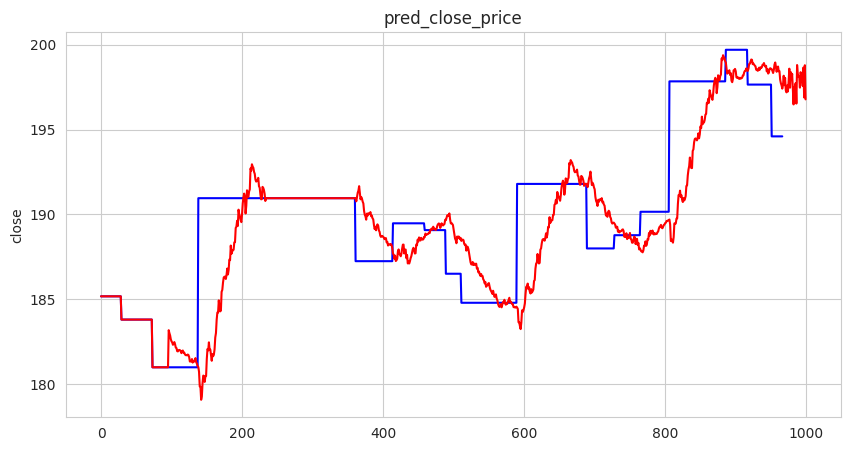

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

start_pos = 1
seq_len = 96
pred_len = 32

df = pd.DataFrame(t[:,1,:])
pred_close_price = df.iloc[:,-6:-5]
pred_close_price = pred_close_price.rename(columns={1539:'close'})
pred_close_price = pd.concat([close_price[start_pos-1:seq_len+start_pos-1], pred_close_price],ignore_index=True)

tail = pd.DataFrame(t[-1,:,:])
tail = tail.iloc[:,-6:-5]
tail = tail.rename(columns={1539:'close'})

pred_close_price = pd.concat([pred_close_price, tail],ignore_index=True)
origin = close_price
pred = pred_close_price
plt.figure(figsize=(10, 5))
sns.lineplot(data=origin,x=range(close_price.shape[0]), y='close', color = 'blue')
sns.lineplot(data=pred, x=range(pred_close_price.shape[0]), y='close', color = 'red')
# Adding title
plt.title('pred_close_price')

# Display the plot
plt.show()

In [77]:
pred

,close
0,183.184708
1,183.012802
2,182.875153
3,182.644775
4,182.530182
...,...
867,197.944504
868,197.729691
869,197.599091
870,197.411331


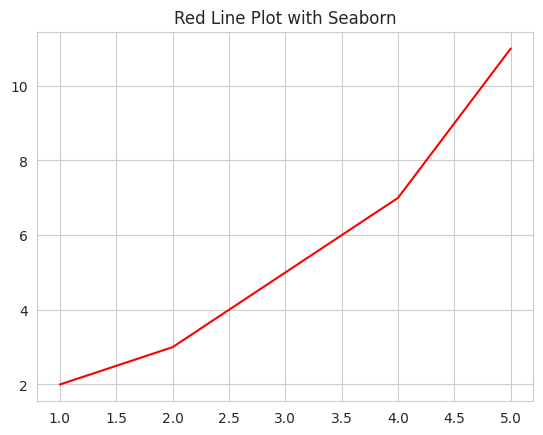

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 使用 Seaborn 绘制折线图，设置线条颜色为红色
sns.lineplot(x=x, y=y, color='red')

# 添加标题
plt.title("Red Line Plot with Seaborn")

# 显示图形
plt.show()